# Assignment 1

## Q1) Harry's Escape

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

### 1a) Test your implementation using the provided foreground(fg.jpg) and background(bg.jpg).

[  0 177  63]


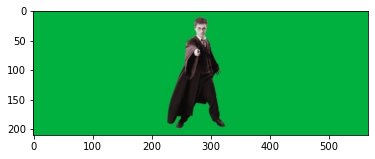

In [2]:
img_fg = cv2.imread("../images/fg.jpg")
img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGR2RGB)
plt.imshow(img_fg)
print(img_fg[100][0])
b ,l, c = img_fg.shape

(210, 567, 3)


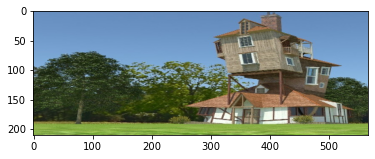

In [3]:
img_bg = cv2.imread("../images/bg.jpg")
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)
img_bg = cv2.resize(img_bg, (l, b))
plt.imshow(img_bg)
print(img_bg.shape)

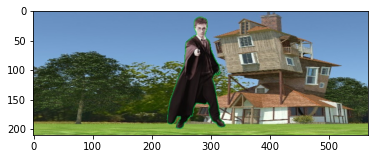

In [4]:
def matt_img(img_fg, img_bg, l, b, c):
    img_fin = np.zeros((b, l , c), dtype= "int64")
    for i in range(b):
        for j in range(l):
            if img_fg[i][j][1] >= 150 and img_fg[i][j][0] <= 30 and img_fg[i][j][2] <= 80:
                img_fin[i][j][0] = img_bg[i][j][0]
                img_fin[i][j][1] = img_bg[i][j][1]
                img_fin[i][j][2] = img_bg[i][j][2]
            else:
                img_fin[i][j][0] = img_fg[i][j][0]
                img_fin[i][j][1] = img_fg[i][j][1]
                img_fin[i][j][2] = img_fg[i][j][2]
    return img_fin
#print(img_fin[0][0], img_bg[0][0], img_fg[0][0])
plt.imshow(matt_img(img_fg, img_bg, l, b, c))

### 1b) Graft Harry Potter onto Hogwarts. Find this magic school’s image from the internet

(210, 567, 3)


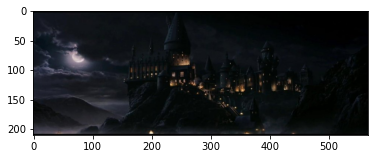

In [5]:
img_bg2 = cv2.imread("../images/bg2.jpg")
img_bg2 = cv2.cvtColor(img_bg2, cv2.COLOR_BGR2RGB)
img_bg2 = cv2.resize(img_bg2, (l, b))
plt.imshow(img_bg2)
print(img_bg2.shape)

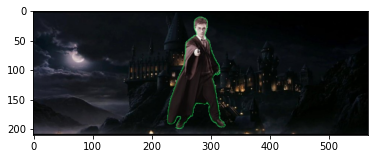

In [6]:
plt.imshow(matt_img(img_fg, img_bg2, l, b, c))

### 1c) Be creative and try out with different foreground and background images of your choice and show the results.

[ 16 255   6]


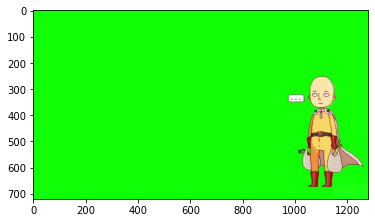

In [7]:
img_fg3 = cv2.imread("../images/fg3.jpg")
img_fg3 = cv2.cvtColor(img_fg3, cv2.COLOR_BGR2RGB)
print(img_fg3[0][0])
plt.imshow(img_fg3)
b ,l, c = img_fg3.shape

(720, 1280, 3)


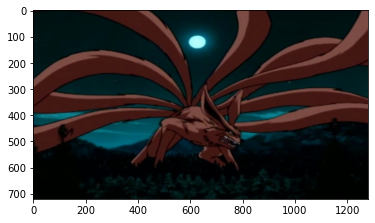

In [8]:
img_bg3 = cv2.imread("../images/bg3.jpg")
img_bg3 = cv2.cvtColor(img_bg3, cv2.COLOR_BGR2RGB)
img_bg3 = cv2.resize(img_bg3, (l, b))
plt.imshow(img_bg3)
print(img_bg3.shape)

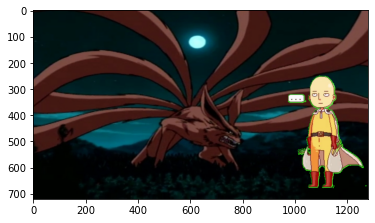

In [9]:
plt.imshow(matt_img(img_fg3, img_bg3, l, b, c))

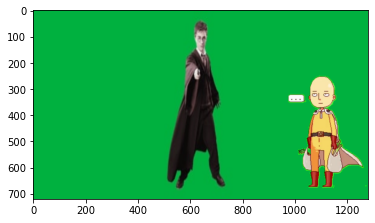

In [10]:
img_fg2 = cv2.resize(img_fg, (l, b))
plt.imshow(matt_img(img_fg3, img_fg2, l, b, c))

### 2) Moody also wants to know how many images of size 720 x 576 can be stored if cloud of size 2 GB is available. Assuming images are stored for displaying on standard displays, calculate the number of images you can store in the cloud.

#### Given image size = $720 * 576*3$. This gives an aspect ration of 5:4.
#### Size of each image = $1.186523438 MB$
#### Number of images that can be stored = $floor(2GB/ 1.186523438 MB) = 1726$

## Q2)Colin’s Storage Issues
### Colin has just joined hogwarts and brought a muggle camera with him, He is very excited about all the magical things around him and wants to take many photos. But the problem, it has limited storage of 500 MB. You, as his friend, have to help him by doing the following task. Calculate the maximum dimensions of one image if colin wants to take 200 images back with him when he goes home for summer vacation. Assume all image shapes to be squares. Colin is very curious and expects explanations for all the steps you take for the above task, so explain each step with theoretical details.

#### Total available space = 500MB
#### Number of images required = 200
#### Memory space available for each image = 500MB/200 = 2.5 MB
#### Aspect ratio of image = 1:1
#### Let us assume the dimension of the image to be s * s, then size of each image would be s * s * 3 * (bit depth)
#### Equating that size with maximum size possible for one image, we get:
#### 2.5 * 1024 * 1024 = s * s * 3 
#### Therefore max dimension (s) of the image = floor(512 * sqroot(10/3)) = 934
#### Therefore maximum possible dimension of the image is 934:934

## Q3)Identifying the Basilisk
### Your camera has a square CCD sensor of dimensions 10 x 10 mm with 1024 x 1024 pixels. Focal length of camera lens is equal to 43.5 cm. You need to ensure that the target covers atleast 390 pixels in height in the captured image. As long as you are at a distance of 240m, you are safe from the basilisk. Calculate the height of the creature.

#### From optics we have the lens makers formula:
#### $1/f = 1/v - 1/u$
#### And Magnification (m) -> m = v/u = height of image(Hi)/height of object(Ho)
#### From lens makers formula we have v/u = f/(u + f)
#### substituting above equation in magnification formula:
#### => $f/(u+f) = Hi/Ho$
#### => $Ho = Hi*f/(u+f)$
#### => $Ho = ((390/1024)*10*(10^-3)*(240 + 0.435)/0.435$
#### => $Ho = 10^-2*(390*(240 + 0.435))/(1024*0.435)$
#### => $Ho = 390*(240 + 0.435)/(1024*43.5)$
#### => $Ho = 2.105101697 m$
#### Therefore the height of the basilisk is about 2.105 meters.

## Q4)Draco Strikes Again!
### 1)Write a function bitQuantizeImage which takes an 8-bit image im and k, the number of bits to which the image needs to be quantized to and returns the k-bit quantized image.

In [11]:
def bitQuantizeImage(img, k):
    b, l, c = img.shape
    min = np.min(img)
    max = np.max(img)
    img_out = np.zeros(img.shape, dtype="int64")
    if k != 8:
        for i in range(b):
            for j in range(l):
                for t in range(c):
                    img_out[i][j][t] = math.floor(((float)(img[i][j][t])/(2**(8-k))))*(2**(8-k))
        return img_out
    return img

### 2)Colin wants see how good you are, so prove yourself by running the above function on filch.jpg and find all 8-bits quantization results.

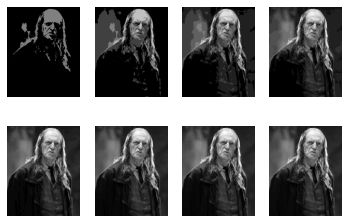

In [12]:
img_filch = cv2.imread("../images/filch.jpg")
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(bitQuantizeImage(img_filch,i+1), cmap="gray")
    plt.axis("off")

### 3)Furthermore he wants you to show all the bit planes of hermoine.jpg.

22


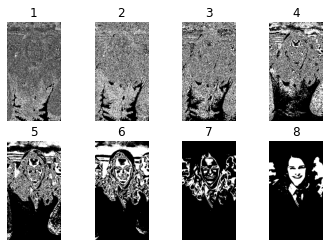

In [13]:
img_herm = cv2.imread("../images/hermoine.jpg")
img_herm = cv2.cvtColor(img_herm, cv2.COLOR_BGR2RGB)
print(img_herm[0][0][2])
def bitplanes(img, pno):
    b, l, c = img.shape
    out = np.zeros((b,l), dtype = "int64")
    for i in range(b):
        for j in range(l):
            num = (0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2])
            for t in range(pno-1):
                num = int(num//2)
            out[i][j] = int((num%2)*255)
                #print(out[i][j][k])
    return out


for i in range(8):
    plt.subplot(2,4,i+1)
    plt.title(i+1)
    plt.imshow(bitplanes(img_herm,i+1), cmap="gray")
    plt.axis("off")
              

### 4)Now that you have gained the trust of Colin Help him guess the corruption procedure for a target person’s image, person corrupt.jpg The correct images that you know for that corresponding person from Colin’s memory represented by person.jpg
#### Roll Number = 2019111025, k = 0

(667, 1000, 3)


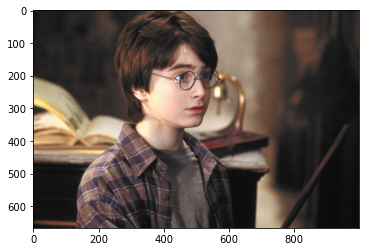

In [14]:
img_harry = cv2.imread("../images/harry.jpg")
img_harry = cv2.cvtColor(img_harry, cv2.COLOR_BGR2RGB)
img_corr = cv2.imread("../images/harry_corrupt.jpg")
plt.imshow(img_harry)
# convert to grayscale and then negative transform?
print(img_corr.shape)

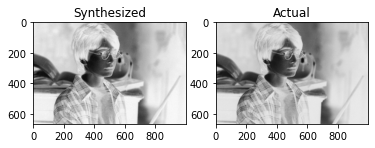

In [15]:
def corrupt(img):
    b, l, c = img.shape
    img_gray = np.zeros((b, l))
    for i in range(b):
        for j in range(l):
            img_gray[i][j] = (0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2])
    img_neg = 255 - img_gray
    #img_fin = np.stack((img_neg,)*3, -1)
    return img_neg

img_expcorr = corrupt(img_harry)
plt.subplot(1,2,1)
plt.title("Synthesized")
plt.imshow(img_expcorr, cmap = "gray")
plt.subplot(1,2,2)
plt.title("Actual")
plt.imshow(img_corr, cmap="gray")

#### The image on the left is the synthesised corrupted image while the one on the right is the given corrupted image.
#### Therefore expected corruption procedure is:
#### 1. Convert image into grayscale
#### 2. Then perform Negative transform to obtain final corrupted image

## Q5) Snape and The Order of The Phoenix

### 1) Write a function linContrastStretching which takes any image im, integers a and b that enhance the contrast such that the resulting intensity range is [a, b].

In [16]:
def linContrastStretching(img, a, b):
    w, l, c = img.shape
    out = np.copy(img)
    gray = np.zeros((w,l), dtype = "int64")
    for i in range(w):
        for j in range(l):
            gray[i][j] = (0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2])
    minimum = np.min(gray)
    maximum = np.max(gray)
    for i in range(w):
        for j in range(l):
            inc = a + (float)((b-a)*(gray[i][j] - minimum))/(maximum - minimum) - gray[i][j]
            for k in range(c):
                out[i][j][k] = img[i][j][k] + inc
                if out[i][j][k] > 255:
                    out[i][j][k] = 255
                if out[i][j][k] < 0:
                    out[i][j][k] = 0
                
    return out
    

### 2) Use the function to improve the intensity of phoenix-bad.jpg and supposedly assist Voldemort.

(-0.5, 989.5, 409.5, -0.5)

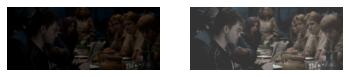

In [17]:
img_phoenix = cv2.imread("../images/phoenix-bad.jpg")
img_phoenix = cv2.cvtColor(img_phoenix, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(img_phoenix)
plt.axis("off")
plt.subplot(1,2,2)
img_better = linContrastStretching(img_phoenix, 50, 250)
plt.imshow(img_better)
plt.axis("off")

### 3) Show the input image and the resultant image along with their colorbars (a strip containing k most frequently occurring colors). Give suitable explanation for the resulting colorbars.

(-0.5, 39.5, 1.5, -0.5)

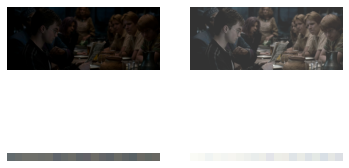

In [18]:
def colorbar(img, k):
    tot = 256*256*256 + 1
    b, l, c = img.shape
    freq = np.zeros((tot, 2), dtype="int64")
    for i in range(b):
        for j in range(l):
            key = 0
            for t in range(c):
                key += (256**t)*img[i][j][t]
            freq[key][1] += 1
            freq[key][0] = key 
                    
    sortedfreq = -np.sort(-freq, axis = 0)
                    
    w = k//10
    if w < 1:
        w = 1
    cbar = np.zeros((w,w*k,3), dtype="int64")
                    
    for i in range(0,w*k,w):
        cbar[0][i][0] = sortedfreq[i][0]%(256)
        cbar[0][i][1] = ((sortedfreq[i][0]%(256**2)) - cbar[0][i][0])/256
        cbar[0][i][2] = (sortedfreq[i][0] - cbar[0][i][0] - cbar[0][i][1]*256)/(256*256)
        for j in range(1,w):
            cbar[0][i+j] = cbar[0][i]


    for i in range(1,w):
        cbar[i] = cbar[0]
        
    return cbar

better_cbar = colorbar(img_better,20)
phoenix_cbar = colorbar(img_phoenix,20)
#for i in range(20):
#    print(better_cbar[0][i][0], better_cbar[0][i][1], better_cbar[0][i][2],"   ",phoenix_cbar[0][i][0], phoenix_cbar[0][i][1], phoenix_cbar[0][i][2])
#'''
plt.subplot(2,2,1)
plt.imshow(img_phoenix)
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(img_better)
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(phoenix_cbar)
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(better_cbar)
plt.axis("off")
#'''

#### Explanation for colorbars:
#### The colorbar for given image consists mostly of dark colors, i.e low intensity colors
#### ON performing the linear transform all these dark colors have been mapped to higher intensity colors, this leads to the new colorbar consisting of much brighter set of colors

### Bellatrix wants you to be debriefed first just after your return. She has your wand and all high-level clearance passes on hold till then. Explain the improvement in the contrast theoretically, so that she releases your documents and you can carry on with your spying assignment.

#### The linearContrastStretching function takes an input image and changes the range of its intensity values to the given range of [a,b].
#### This is done by first calculating the intensity of a given pixel in the image and then mapping it to the corresponding intensity in the [a,b] range
#### The mapping function is: $a + ((b-a) * (intensity - minimum))/(maximum - minimum)$
#### (intensity - minimum)/(maximum - minimum), this takes the intesity into the range of [0,1]
#### Then multiplying it with (b-a) takes the intensity into the range [0, (b-a)]
#### Finally adding a gives us our desired intensity range of [a, b]

## Q6) Hermoine and linear transforms

### 1) Write a function piecewiseLinTransform to implement a piecewise linear transform

In [19]:
def cvtGrayscale(img):
    if len(img.shape) < 3:
        return img
    b, l, c = img.shape
    gray = np.zeros((b,l), dtype = "int64")
    for i in range(b):
        for j in range(l):
            gray[i][j] = (0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2])
    return gray               

def piecewiseLinTransform(image, K1, K2, a, b): #K1,K2,a,b are arrays
    #print(img.shape)
    w=h=c=0
    isColor = False
    if len(image.shape) == 2:
        w, h = image.shape
        img = np.copy(image)
    elif len(image.shape) == 3:
        w,h,c = image.shape
        img = cvtGrayscale(image)
        isColor = True
    out = np.copy(img)
    maximum = np.max(img)
    for t in range(len(K1)):
        for i in range(w):
            for j in range(h):
                if img[i][j] >= a[t]*maximum and img[i][j] <= b[t]*maximum:
                    out[i][j] = K1[t]*(img[i][j]//maximum) + K2[t]
                    if out[i][j] > 255:
                        out[i][j] = 255
                    elif out[i][j] < 0:
                        out[i][j] = 0
    if isColor:
        fin = np.copy(image)
        for i in range(w):
            for j in range(h):
                delta = out[i][j] - img[i][j]
                for t in range(c):
                    fin[i][j][t] = image[i][j][t] + delta
        return fin
    return out

### 2) Run the images through piecewiseLinTransform on snape1.jpg and hagrid.jpg.The piecewise linear functions to be used are given for each image.

(-0.5, 779.5, 437.5, -0.5)

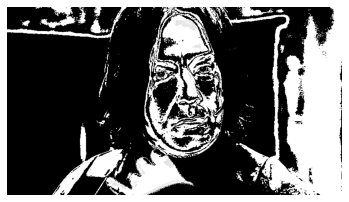

In [20]:
img_snape = cv2.imread("../images/snape1.jpg")
img_snape = cv2.cvtColor(img_snape, cv2.COLOR_BGR2RGB)
img_graySnape = cvtGrayscale(img_snape)
c = 0
output = img_graySnape
K1 = []
K2 = []
a = []
b = []
for i in range(6):
    c = c + 255*(i%2)
    K1.append((255/0.15)*((-1)**(i%2)))
    K2.append((-c)*((-1)**(i%2)))
    a.append(0.15*i)
    b.append(0.15*(i+1))
    
output = piecewiseLinTransform(img_graySnape, K1, K2, a,b)
plt.imshow(output, cmap="gray")
plt.axis("off")

(-0.5, 532.5, 399.5, -0.5)

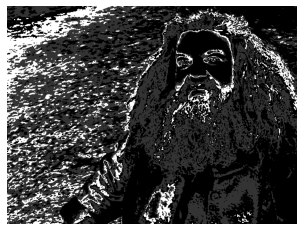

In [21]:
img_hagrid = cv2.imread("../images/hagrid.jpg")
img_hagrid = cv2.cvtColor(img_hagrid, cv2.COLOR_BGR2RGB)
img_grayHagrid = cvtGrayscale(img_hagrid)
K1 = [0,0,204/0.1,-204/0.1, 0, 0]
K2 = [0, 51, (-7)*51, (7)*51, 51, 0]
a = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
b = [0.1, 0.2, 0.3, 0.4, 0.5, 1]
output = piecewiseLinTransform(img_grayHagrid, K1, K2, a, b)
plt.imshow(output, cmap="gray")
plt.axis("off")

### 3) Take your photo, convert to grayscale, and run piecewiseLinTransform using any custom piecewise linear function that you like. Plot the function used.

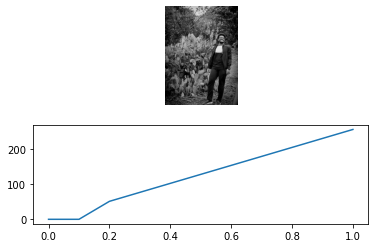

In [22]:
img_me = cv2.imread("../images/adi.jpg")
img_me = cv2.cvtColor(img_me, cv2.COLOR_BGR2RGB)
img_gray = cvtGrayscale(img_me)
plt.subplot(2,1,1)
plt.imshow(img_gray, cmap = "gray")
plt.axis("off")
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y = [0, 0, 51, 255*0.3, 0.4*255, 0.5*255, 0.6*255, 0.7*255, 0.8*255, 0.9*255, 1*255]
plt.subplot(2,1,2)
plt.plot(x, y)

(-0.5, 1099.5, 1503.5, -0.5)

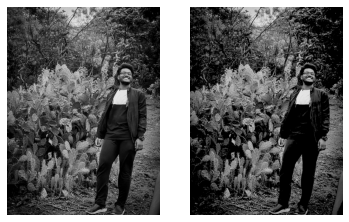

In [23]:
c = 0
K1 = [0,500]
K2 = [0,-51]
a = [0,0.1]
b = [0.1,0.2]
output = piecewiseLinTransform(img_gray, K1, K2, a, b)
plt.subplot(1,2,2)
plt.imshow(output, cmap="gray")
plt.axis("off")
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

## Q7) The Marauder’s Map

### 1) Write a function histEqualization which takes a grayscale image img, and applies histogram equalization on the entire image.

In [24]:
def histEqualization(img):
    freq = np.zeros(256)
    newint = np.zeros(256, dtype = "int64")
    sigma = 0
    out = np.copy(img)
    #out = cvtGrayscale(img)
    #b, l = out.shape
    b, l, c = img.shape
    for i in range(b):
        for j in range(l):
            freq[img[i][j][0]] += 1
    freq = freq/(b*l)
    
    for i in range(256):
        sigma += freq[i]
        newint[i] = 255*sigma
    
    for i in range(b):
        for j in range(l):
            for k in range(c):
                out[i][j][k] = newint[img[i][j][0]]
    return out


### 2) Apply the function on fred.jpeg and display the input image and the resultant image. Plot the histograms for input and resultant image and explain the changes you observe for each image.

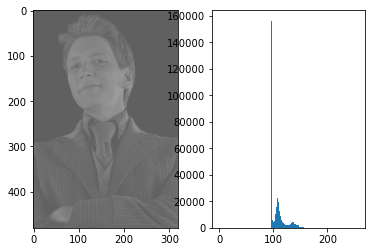

In [25]:
img_fred = cv2.imread("../images/fred.jpeg")
img_fred = cv2.cvtColor(img_fred, cv2.COLOR_BGR2RGB)
img_grayFred = cvtGrayscale(img_fred)
plt.subplot(1,2,1)
plt.imshow(img_fred)#, cmap = "gray")
plt.subplot(1,2,2)
plt.hist(img_fred.ravel(), 256, [0,256])
plt.show()

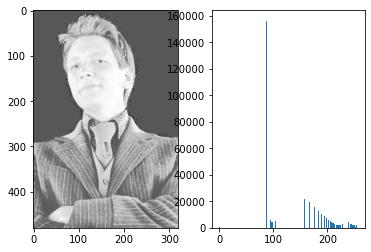

In [26]:
img_fredEqualized = histEqualization(img_fred)
plt.subplot(1,2,1)
plt.imshow(histEqualization(img_fred), cmap = "gray")
plt.subplot(1,2,2)
plt.hist(img_fredEqualized.ravel(), 256, [0,256])
plt.show()

#### In this case the image has most of the pixels concentrated in the intensity range of about (80,150). After equalization the range changes to about (80, 255).
#### Therefore increasing total brightness in the image
#### Since the minimum remained same, the overall contrast is also better in the equalized image

### 3) Write a function histMatching which takes an input image and a reference image and applies histogram matching on the input image by matching the histogram with that of the reference image.

In [27]:
def histmatching(img1, img2):
    img1_gray = cvtGrayscale(img1)
    img2_gray = cvtGrayscale(img2)
    b1, l1, c1 = img1.shape
    b2, l2, c2 = img2.shape
    out = np.copy(img1)
    sigma = 0
    prob2 = np.zeros(256)
    equal2 = np.zeros(256, dtype = "int64")
    for i in range(b2):
        for j in range(l2):
            prob2[img2[i][j][0]] += 1
    prob2 = prob2/(b2*l2)
    for i in range(256):
        sigma += prob2[i]
        equal2[i] = sigma*255
    #equal1
    sigma = 0
    prob1 = np.zeros(256)
    equal1 = np.zeros(256, dtype = "int64")
    for i in range(b1):
        for j in range(l1):
              prob1[img1[i][j][0]] += 1
    prob1 = prob1/(b1*l1)
    for i in range(256):
        sigma += prob1[i]
        equal1[i] = sigma*255
    #inverse of equal2
    invEqual2 = np.full(256, -1,dtype= "int64")
    for i in range(256): 
        invEqual2[equal2[i]] = i
    for i in range(256):
        if invEqual2[i] == -1:
            back = 0
            while (i-back)>0 and invEqual2[i-back] == -1 :
                back += 1
            invEqual2[i-back+1:i] = invEqual2[i-back]
    for i in range(256):
        if invEqual2[i] == -1:
            back = 0
            while (i+back)<255 and invEqual2[i+back] == -1:
                back += 1
            invEqual2[i:i+back-1] = invEqual2[i+back]
    # img1->(equal1)->equalized->(invEqual2)->img2
    for i in range(b1):
        for j in range(l1):
            for k in range(c1):
                out[i][j][k] = equal1[img1[i][j][0]]
                out[i][j][k] = invEqual2[out[i][j][k]]
    return out

### 4) Try histogram matching on map.jpeg and map-reference.jpeg

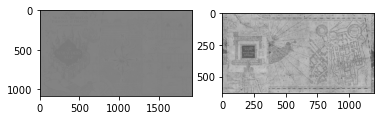

In [29]:
img_map = cv2.imread("../images/map.jpeg")
img_map = cv2.cvtColor(img_map, cv2.COLOR_BGR2RGB)
img_ref = cv2.imread("../images/map-reference.jpeg")
img_ref = cv2.cvtColor(img_ref, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(img_map)
plt.subplot(1,2,2)
plt.imshow(img_ref)

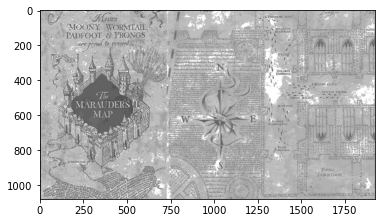

In [30]:

img_matched = histmatching(img_map, img_ref)
plt.imshow(img_matched, cmap = "gray")

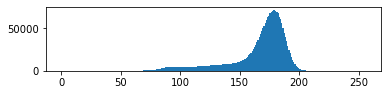

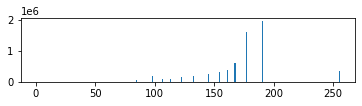

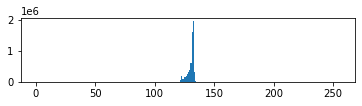

In [31]:
plt.subplot(3,1,1)
plt.hist(img_ref.ravel(),256,[0,256])
plt.show()
plt.subplot(3,1,2)
plt.hist(img_matched.ravel(),256,[0,256])
plt.show()
plt.subplot(3,1,2)
plt.hist(img_map.ravel(),256,[0,256])
plt.show()

## Q8) The Seven Horcruxes

### 1) Write a function gammaTransform that implements $s = r^γ$ on a grayscale image and vary γ. Report your observations when γ is less than 1 and when γ is greater than 1.

In [32]:
def gammaTransform(img, gamma):
    coeff = [0.299, 0.587, 0.114]
    gray = []
    if len(img.shape) == 3:
        b, l, c = img.shape
        gray = cvtGrayscale(img)
    elif len(img.shape) == 2:
        b,l = img.shape
        gray = np.copy(img)
    out = np.copy(gray)
    maximum = np.max(gray)
    for i in range(b):
        for j in range(l):
            delta = (255)*(gray[i][j]**(gamma))/(maximum**gamma) - gray[i][j]
            out[i][j] = gray[i][j] + delta
            if out[i][j] > 255:
                out[i][j] = 255
            if out[i][j] < 0:
                out[i][j] = 0
    return out           

#### OBSERVATIONS:
#### From below set of images, we can see that:
#### 1) In case of γ < 1, pixels with lower intensity are stretched into higher intensity regions, therefore creating an impression of an overall brightness increase an decrease in contrast
#### 2) In case of γ = 1, there is no change in the image
#### 3) In case of γ > 1, pixels with lower intensities are further pushed down into low intesity regions while pixels with higher intensities are stretched into high intensity regions, therefore creating an impression of low brightness and high contrast

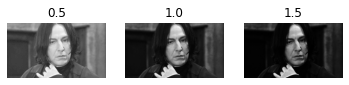

In [42]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(gammaTransform(img_snape,0.5*(i+1)), cmap="gray")
    plt.title(0.5*(i+1))
    plt.axis("off")

### 2) Apply gamma transformation on locket.jpeg to increase the brightness in the image. Report your observations.
#### OBSERVATIONS:
#### Decreasing gamma (i.e. gamma < 1) leads to increase in brightness of the image and decrease in contrast
#### This is because with gamma less than 1 lower intensities are stretched out while higher intensities are compressed

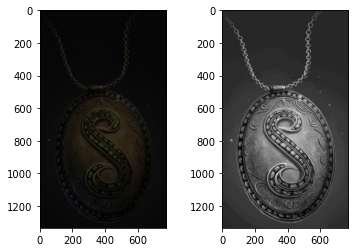

In [34]:
img_locket = cv2.imread("../images/locket.jpeg")
img_locket = cv2.cvtColor(img_locket, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(img_locket)
plt.subplot(1,2,2)
img_out = gammaTransform(img_locket, 0.75)
plt.imshow(img_out, cmap="gray")

### 3) Apply gamma transformation on voldemort.jpeg to decrease the brightness in the image. Report your observations.
#### OBSERVATIONS:
#### Increasing gamma (i.e. gamma > 1) leads to decrease in brightness of the image and increase in contrast
#### This is because with gamma greater than 1 higher intensities are stretched out while lower intensities are compressed

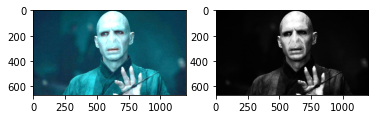

In [35]:
img_vold = cv2.imread("../images/voldemort.jpeg")
img_vold = cv2.cvtColor(img_vold, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(img_vold)
plt.subplot(1,2,2)
img_out = gammaTransform(img_vold, 2.5)
plt.imshow(img_out, cmap="gray")

## Q9) Is that the best you got?

### 1) You are provided with 4 grayscale images (neville1.jpg, neville2.jpg, neville3.jpg, neville4.jpg) with different contrast levels, which correspond to parts of the same image.

(-0.5, 959.5, 394.5, -0.5)

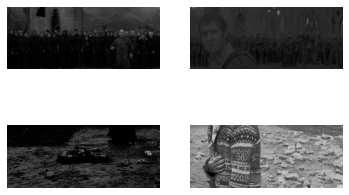

In [36]:
img1 = cv2.imread("../images/neville1.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../images/neville2.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread("../images/neville3.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.imread("../images/neville4.jpg")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.subplot(2,2,1)
plt.imshow(img1)
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(img3)
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(img2)
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(img4)
plt.axis("off")

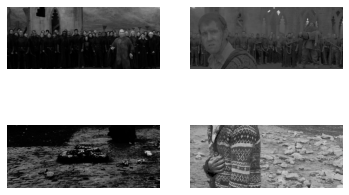

In [37]:
# Using linear contrast stretching, get all the images into the same range
minimum = 255
maximum = 0
images = [img1, img3, img2, img4] #changed order
for i in range(4):
    if (minimum > np.min(images[i])):
        minimum = np.min(images[i])
    if (maximum < np.max(images[i])):
        maximum = np.max(images[i])
img_linstr = []
for i in range(4):
    img_linstr.append(linContrastStretching(images[i], minimum, maximum))
    plt.subplot(2,2,i+1)
    plt.imshow(img_linstr[i])
    plt.axis("off")

(-0.5, 959.5, 394.5, -0.5)

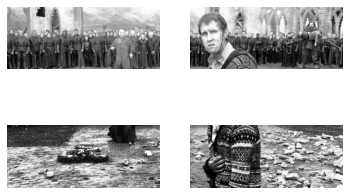

In [38]:
#try to match the histograms of all four images, maybe equalize all of them and then do a piecewisecontraststretching
img_eq = []
for i in range(4):
    img_eq.append(histEqualization(img_linstr[i]))
    plt.subplot(2,2,i+1)
    plt.imshow(img_eq[i])
    plt.axis("off")
#plt.subplot(2,2,4)
#plt.imshow(img_linstr[3])
plt.axis("off")

In [39]:
minimum = 255
maximum = 0
for i in range(4):
    if (minimum > np.min(img_eq[i])):
        minimum = np.min(img_eq[i])
    if (maximum < np.max(img_eq[i])):
        maximum = np.max(img_eq[i])

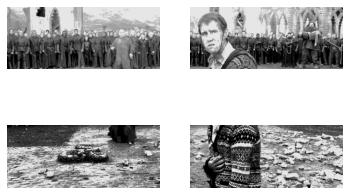

In [40]:
img_pcs = []
for i in range(4):
    img_pcs.append(piecewiseLinTransform(img_eq[i], [500,0],[0,230] ,[0,0.8] ,[0.1,1] ))
    plt.subplot(2,2,i+1)
    plt.imshow(img_pcs[i])
    plt.axis("off")

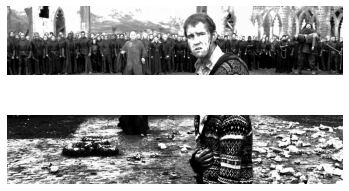

In [41]:
img_gt = []
for i in range(4):
    img_gt.append(gammaTransform(img_pcs[i], 1.6))
    plt.subplot(2,2,i+1)
    plt.imshow(img_gt[i], cmap = "gray")
    plt.axis("off")
plt.subplots_adjust(wspace = 0, hspace = 0)